# [Preprocessing]

*KU LeeDongGyu*

### Install Packages

In [ ]:
pip install opencv-python # cv2

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#'


### Module

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
cd /content/drive/My Drive/Colab Notebooks/Paper

/content/drive/My Drive/Colab Notebooks/Paper


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2 # pip install opencv-python
import os
import sys
import matplotlib.pyplot as plt
import copy
from imp import reload
from PIL import Image #pip install image
from tensorflow.keras.preprocessing.image import img_to_array , load_img
import glob

## 1. Data Import & Save
---

In [4]:
train= glob.glob(os.path.join(os.getcwd(),'CIFAR100/No_GAN/data/train/*/*'))
valid=glob.glob(os.path.join(os.getcwd(),'CIFAR100/No_GAN/data/valid/*/*'))
test=glob.glob(os.path.join(os.getcwd(),'CIFAR100/No_GAN/data/test/*/*'))

In [5]:
print(len(train))
print(len(valid))
print(len(test))

39941
10059
10000


In [6]:
###########################
mit_classes = os.listdir(os.path.join(os.getcwd(),'CIFAR100/No_GAN/data/test'))
names = {}
for i,mit_class in enumerate(mit_classes):
    names[i] = mit_class

In [7]:
new_dict = {}
for i,j in zip(names.keys(),names.values()):
    new_dict[j] = i 

##
# 위는 아래와 같음.
# new_dict = {}
# for i,j in names.items():
#     new_dict[j] = i 
##

###########################

In [8]:
###########################
# data save는 생략하였음. #
###########################
#x_train = [] # 쓸데없이 오래걸리니 생략
y_train = []
for path in train:
    #img=img_to_array(load_img(path))
    #x_train.append(img) # 쓸데없이 오래걸리니 생략
    
    label = path.split('/')[-2]
    label_num = new_dict[label]
    y_train.append(label_num)

In [9]:
###########################
# data save는 생략하였음. #
###########################
#x_valid = [] # 쓸데없이 오래걸리니 생략
y_valid = []
for path in valid:
    #img=img_to_array(load_img(path))
    #x_valid.append(img) # 쓸데없이 오래걸리니 생략

    label = path.split('/')[-2]
    label_num = new_dict[label]
    y_valid.append(label_num)

In [10]:
###########################
# data save는 생략하였음. #
###########################
#x_test = [] # 쓸데없이 오래걸리니 생략
y_test = []
for path in test:
    #img=img_to_array(load_img(path)) 
    #x_test.append(img) # 쓸데없이 오래걸리니 생략

    label = path.split('/')[-2]
    label_num = new_dict[label]
    y_test.append(label_num)

In [ ]:
### 도표를 그리기 위한 밑작업

In [11]:
y_train_label = []
for path in train:
    label = path.split('/')[-2]
    y_train_label.append(label)

# the number of images per each class
y_train_count = {}
for word in y_train_label:
    if word not in y_train_count:
        y_train_count[word]=1
    else:
        y_train_count[word]+=1

In [12]:
y_valid_label = []
for path in valid:
    label = path.split('/')[-2]
    y_valid_label.append(label)

# the number of images per each class
y_valid_count = {}
for word in y_valid_label:
    if word not in y_valid_count:
        y_valid_count[word]=1
    else:
        y_valid_count[word]+=1

In [13]:
y_test_label = []
for path in test:
    label = path.split('/')[-2]
    y_test_label.append(label)

# the number of images per each class
y_test_count = {}
for word in y_test_label:
    if word not in y_test_count:
        y_test_count[word]=1
    else:
        y_test_count[word]+=1

## 2. Data Summary
---

In [14]:
## 2.1 the number of labels

y_train = np.array(y_train).reshape(-1,1)
y_valid = np.array(y_valid).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)
y_total = np.vstack([y_train,y_valid,y_test])

In [15]:
### 2.2.1 total
y_total = y_total.flatten()
count_total = pd.value_counts(y_total, sort=True)
count_total = count_total.rename(index=names)
print(count_total) ; print("\nTotal:",sum(count_total))

worm            600
shrew           600
fox             600
shark           600
beetle          600
               ... 
sweet_pepper    600
crab            600
orchid          600
telephone       600
apple           600
Length: 100, dtype: int64

Total: 60000


In [ ]:
index = np.arange(len(names))

In [ ]:
count_total.index

Index(['worm', 'shrew', 'fox', 'shark', 'beetle', 'keyboard', 'rabbit',
       'beaver', 'house', 'road', 'bowl', 'kangaroo', 'bus', 'pickup_truck',
       'lion', 'skunk', 'boy', 'lizard', 'skyscraper', 'castle', 'mushroom',
       'sunflower', 'camel', 'oak_tree', 'baby', 'raccoon', 'leopard',
       'bottle', 'flatfish', 'possum', 'wardrobe', 'bed', 'forest', 'rose',
       'woman', 'aquarium_fish', 'lamp', 'seal', 'wolf', 'bee', 'hamster',
       'sea', 'trout', 'bear', 'girl', 'rocket', 'bicycle', 'lawn_mower',
       'ray', 'spider', 'cattle', 'man', 'television', 'poppy', 'tiger',
       'clock', 'plate', 'tractor', 'cockroach', 'pear', 'train', 'dinosaur',
       'porcupine', 'turtle', 'couch', 'otter', 'tulip', 'dolphin',
       'palm_tree', 'whale', 'cloud', 'plain', 'willow_tree', 'elephant',
       'crocodile', 'pine_tree', 'snake', 'cup', 'caterpillar', 'mouse',
       'snail', 'bridge', 'motorcycle', 'squirrel', 'butterfly', 'lobster',
       'tank', 'can', 'mountain', 's

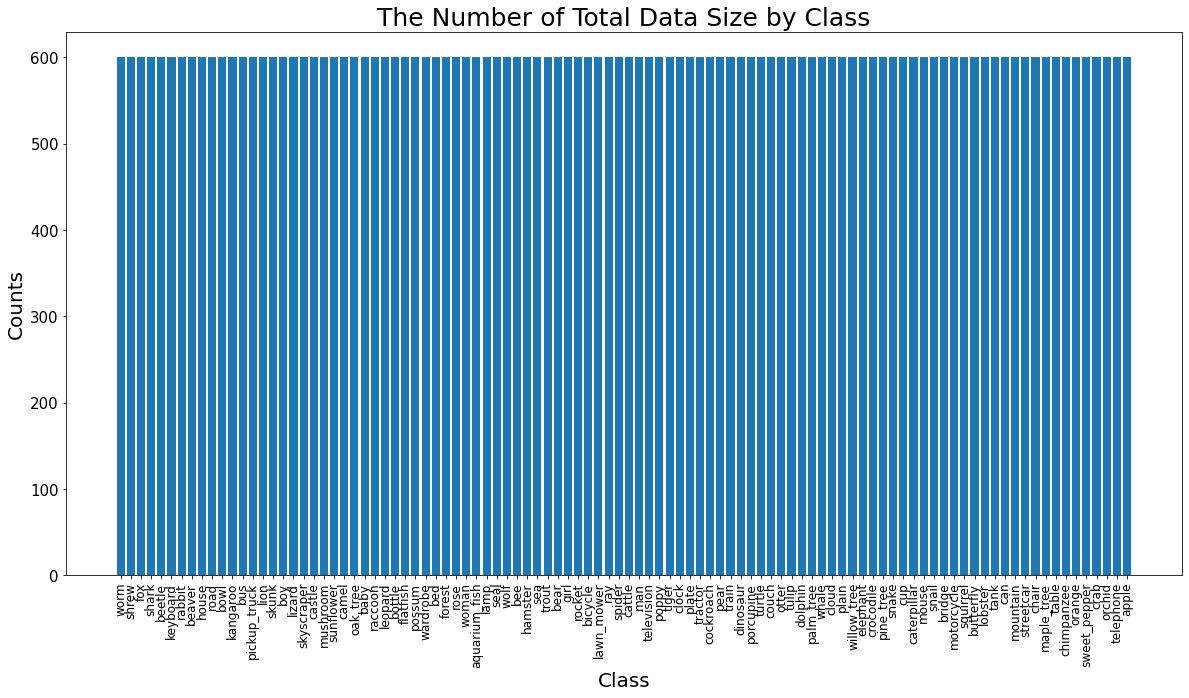

In [ ]:
plt.figure(figsize=(20, 10))
plt.bar(index, count_total)
plt.title('The Number of Total Data Size by Class', fontsize=25)
plt.xlabel('Class', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.xticks(index, count_total.index, fontsize=12,rotation=90)
plt.yticks(fontsize=15)
plt.show()

In [ ]:
### 2.2.2 train & valid
y_tr_valid = np.vstack([y_train,y_valid])
count_train = pd.value_counts(y_tr_valid.flatten(), sort=True)
count_train = count_train.rename(index=names)
print(count_train) ; print("\nTrain:",sum(count_train))

worm            500
shrew           500
fox             500
shark           500
beetle          500
               ... 
sweet_pepper    500
crab            500
orchid          500
telephone       500
apple           500
Length: 100, dtype: int64

Train: 50000


In [ ]:
### 2.2.2 train

count_train = pd.value_counts(y_train.flatten(), sort=True)
count_train = count_train.rename(index=names)
print(count_train) ; print("\nTrain:",sum(count_train))

chair        417
telephone    417
shrew        415
otter        414
wolf         413
            ... 
table        387
wardrobe     387
cloud        387
fox          385
streetcar    378
Length: 100, dtype: int64

Train: 39941


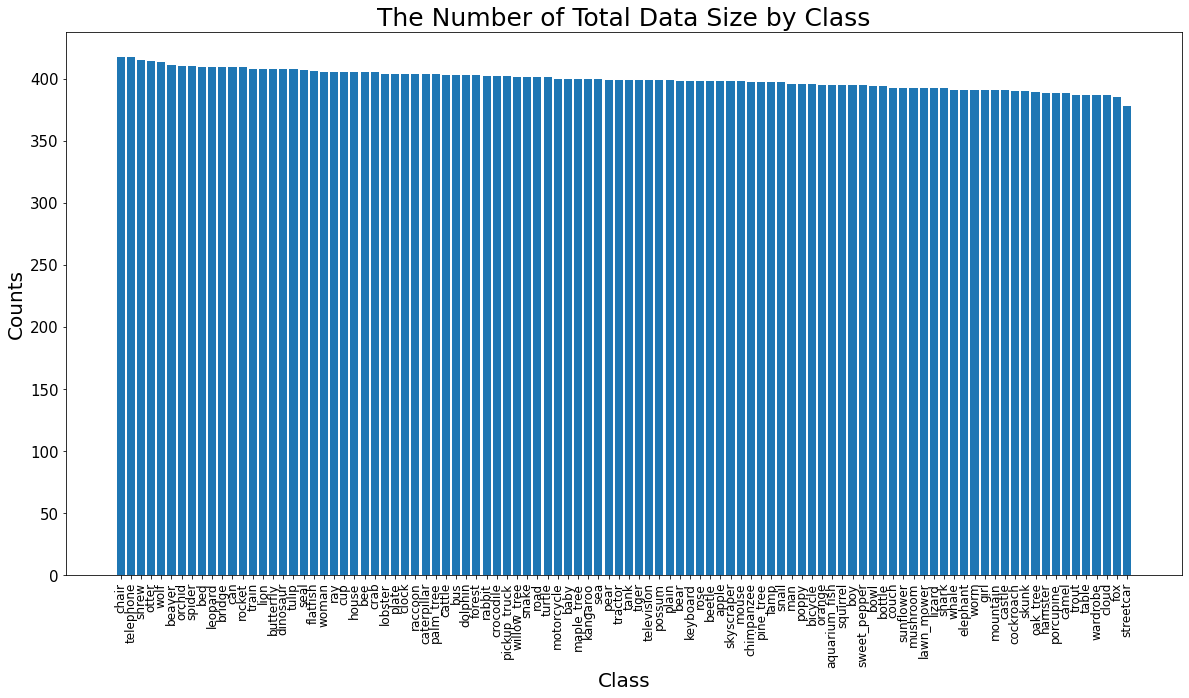

In [ ]:
plt.figure(figsize=(20, 10))
plt.bar(index, count_train)
plt.title('The Number of Total Data Size by Class', fontsize=25)
plt.xlabel('Class', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.xticks(index, count_train.index, fontsize=12,rotation=90)
plt.yticks(fontsize=15)
plt.show()

([], [])

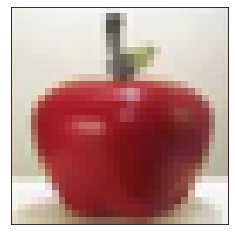

In [34]:
plt.imshow(plt.imread(train[1]))
plt.xticks([],[])
plt.yticks([],[])

([], [])

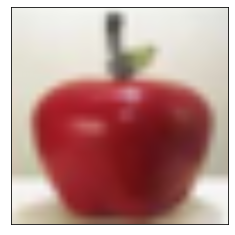

In [35]:
plt.imshow(cv2.resize(plt.imread(train[1]),(256,256)))
plt.xticks([],[])
plt.yticks([],[])

In [36]:
def random_crop(img, random_crop_size):
    # Note: image_data_format is 'channel_last'
    assert img.shape[2] == 3 # img.shape[2] 가 3(rgb)이 아니면 assertion error 발생
    height, width = img.shape[0], img.shape[1]
    dy, dx = random_crop_size
    x = np.random.randint(0, width - dx + 1)
    y = np.random.randint(0, height - dy + 1)
    return img[y:(y+dy), x:(x+dx), :]

In [50]:
from tensorflow.keras.preprocessing.image import array_to_img

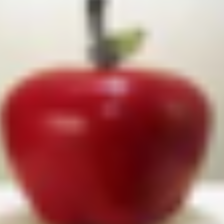

In [51]:
array_to_img(random_crop(cv2.resize(img_to_array(load_img(train[1])),(256,256)), (224, 224)))

## 3. Data Handling
---

In [28]:
names.values()

dict_values(['apple', 'bed', 'aquarium_fish', 'bee', 'bear', 'bicycle', 'bottle', 'baby', 'beetle', 'beaver', 'bowl', 'bus', 'boy', 'castle', 'camel', 'cattle', 'caterpillar', 'bridge', 'butterfly', 'can', 'chair', 'chimpanzee', 'crab', 'cup', 'crocodile', 'clock', 'cockroach', 'dinosaur', 'couch', 'dolphin', 'cloud', 'elephant', 'flatfish', 'forest', 'lamp', 'hamster', 'girl', 'lawn_mower', 'leopard', 'fox', 'keyboard', 'house', 'kangaroo', 'lion', 'lizard', 'mushroom', 'oak_tree', 'man', 'mouse', 'motorcycle', 'lobster', 'mountain', 'maple_tree', 'orange', 'orchid', 'pine_tree', 'poppy', 'plate', 'pear', 'porcupine', 'otter', 'palm_tree', 'plain', 'pickup_truck', 'possum', 'rose', 'seal', 'sea', 'rocket', 'ray', 'raccoon', 'shark', 'rabbit', 'road', 'shrew', 'skunk', 'skyscraper', 'sunflower', 'spider', 'snake', 'snail', 'squirrel', 'tank', 'streetcar', 'table', 'sweet_pepper', 'telephone', 'television', 'tiger', 'tractor', 'train', 'turtle', 'tulip', 'whale', 'willow_tree', 'worm', 

In [22]:
test_names = ['apple','bed','aquarium_fish','bee','bear','bicycle','bottle','baby','beetle','beaver','bowl','bus','boy']
number = 15

In [29]:
test1 = glob.glob('./CIFAR100/No_GAN/data/train/apple/*')[:number]
test2 = glob.glob('./CIFAR100/No_GAN/data/train/bed/*')[:number]
test3 = glob.glob('./CIFAR100/No_GAN/data/train/aquarium_fish/*')[:number]
test4 = glob.glob('./CIFAR100/No_GAN/data/train/bee/*')[:number]
test5 = glob.glob('./CIFAR100/No_GAN/data/train/bear/*')[:number]
test6 = glob.glob('./CIFAR100/No_GAN/data/train/bicycle/*')[:number]
test7 = glob.glob('./CIFAR100/No_GAN/data/train/bottle/*')[:number]
test8 = glob.glob('./CIFAR100/No_GAN/data/train/baby/*')[:number]
test9 = glob.glob('./CIFAR100/No_GAN/data/train/beetle/*')[:number]
test10 = glob.glob('./CIFAR100/No_GAN/data/train/beaver/*')[:number]
test11 = glob.glob('./CIFAR100/No_GAN/data/train/bowl/*')[:number]
test12 = glob.glob('./CIFAR100/No_GAN/data/train/bus/*')[:number]
test13 = glob.glob('./CIFAR100/No_GAN/data/train/boy/*')[:number]
test_bundle=[test1,test2,test3,test4,test5,test6,test7,test8,test9,test10,test11,test12,test13]

test_bundle=sum(test_bundle,[])

In [30]:
def combine_images(generated_images,gen_num_images=10): # generated_images는 4d tensor
    num_images = generated_images.shape[0] # 이미지의 개수
    new_width = gen_num_images # 가로의 길이는 10개 
    new_height = int(num_images / new_width)
    grid_shape = generated_images.shape[1:3] # 예를들면, (48,48)가 저장
    grid_image = np.zeros((new_height * grid_shape[0], new_width * grid_shape[1],3), dtype=generated_images.dtype) # 전체 이미지 공간 생성
    for index, img in enumerate(generated_images): # 70장이들어올꺼임.
        i,j = divmod(index, new_width)
        grid_image[i * grid_shape[0]:(i + 1) * grid_shape[0], j * grid_shape[1]:(j + 1) * grid_shape[1],:] = img[:, :, :] # enumerate를 하면 나오는 img차원은 3d tensor(갯수부분이 사라짐)
    return grid_image

In [31]:
images =[]
for dir in test_bundle:
    img = plt.imread(dir)
    images.append(img)
    
images = np.array(images)

In [32]:
combined = combine_images(images,gen_num_images=number)

([], [])

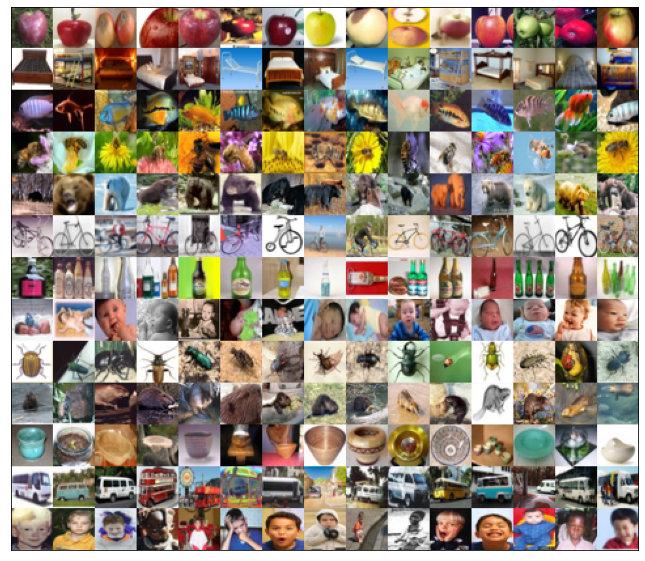

In [33]:
#['apple','bed','aquarium_fish','bee','bear','bicycle','bottle','baby','beetle','beaver','bowl','bus','boy']
plt.figure(figsize=(15,10))
plt.imshow(combined)
plt.xticks([],[])
plt.yticks([],[])